In [1]:
from keras import models

model = models.load_model('../cats-and-dogs/cats_and_dogs_small_data_aug_1.h5')

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
import os
import numpy as np

dataset_dir = '/home/guhwanbae/workspace/machine-learning/resource/cats-and-dogs-small'
test_dir = os.path.join(dataset_dir, 'test/cats')

random_index = np.random.randint(low=1500, high=2000)
random_file_name = '.'.join(['cat', str(random_index), 'jpg'])
random_file_path = os.path.join(test_dir, random_file_name)

print(random_file_name)
print(random_file_path)

cat.1850.jpg
/home/guhwanbae/workspace/machine-learning/resource/cats-and-dogs-small/test/cats/cat.1850.jpg


In [4]:
from keras.preprocessing import image

input_shape = (150, 150)
img = image.load_img(random_file_path, target_size=input_shape)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

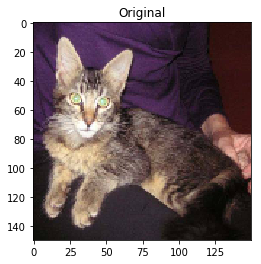

In [6]:
import matplotlib.pyplot as plt

plt.figure('Original')
plt.title('Original')
plt.imshow(img_tensor[0])
plt.show()

In [7]:
# Extract outputs of top 8 layers.
layer_outputs = [layer.output for layer in model.layers[:8]]
# Pass symbolic tensor list to the Model class constructor.
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [8]:
activations = activation_model.predict(img_tensor)

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


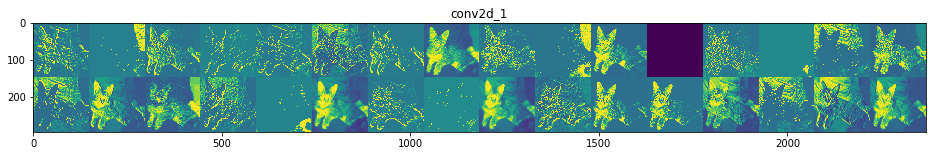

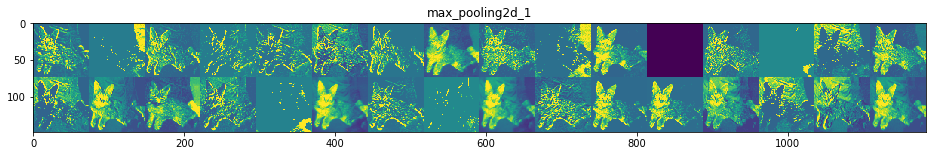

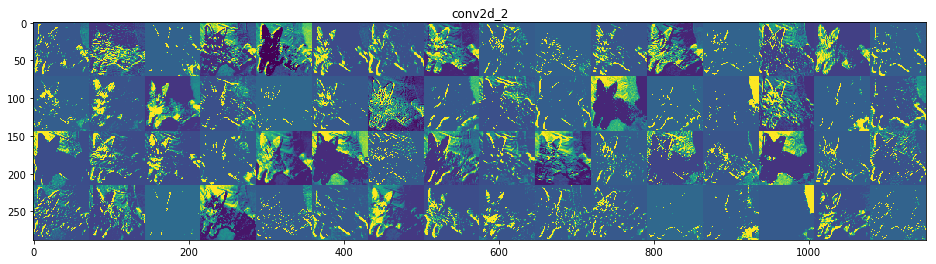

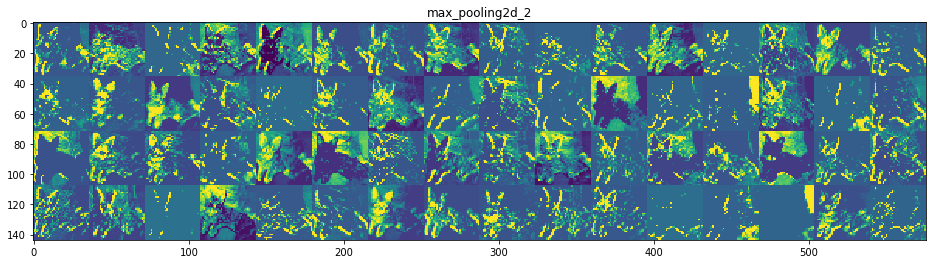

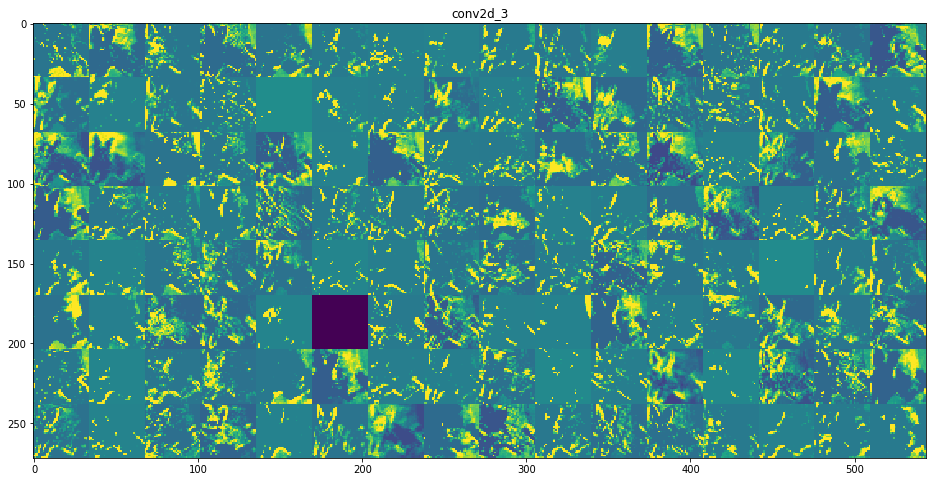

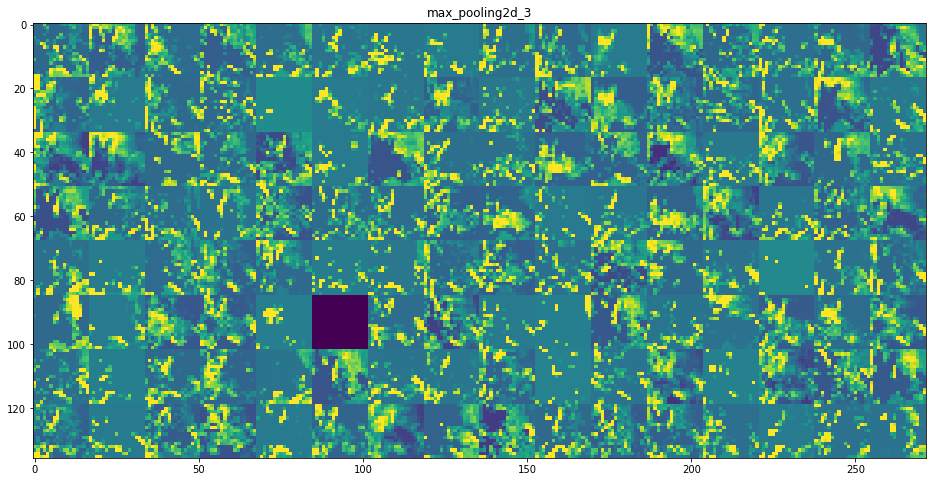

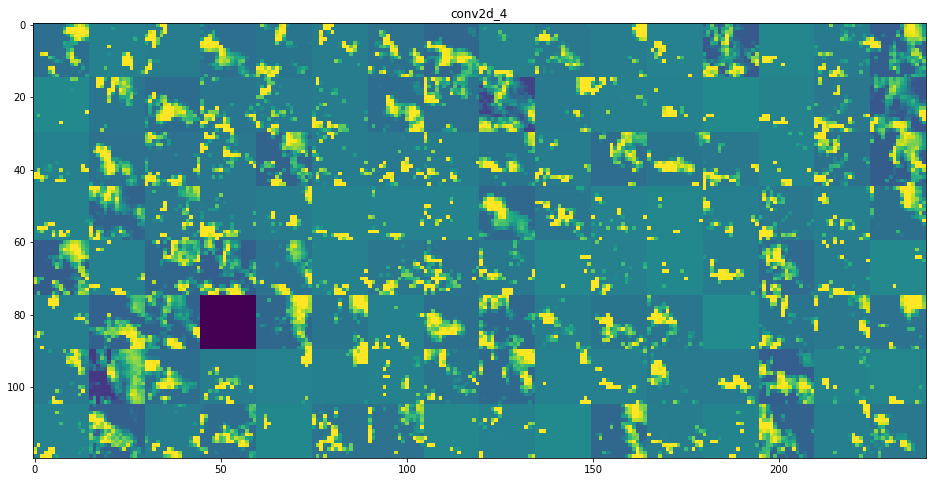

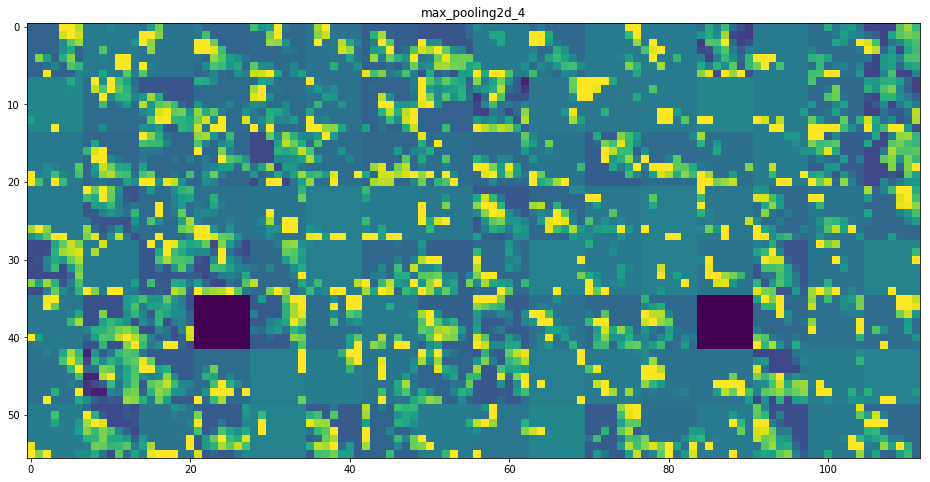

In [9]:
layer_names = [layer.name for layer in model.layers[:8]]

images_per_rows = 16

for name, activation in zip(layer_names, activations):
    # The number of depths.
    n_features = activation.shape[-1]
    size = activation.shape[1]
    n_rows = n_features // images_per_rows
    display_grid = np.zeros((n_rows*size, images_per_rows*size))
    
    for row in range(n_rows):
        for col in range(images_per_rows):
            channel_image = activation[0, :, :, row*images_per_rows+col]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row*size:(row+1)*size,
                         col*size:(col+1)*size] = channel_image
    scale = 1./size
    height, width = display_grid.shape
    plt.figure(name, figsize=(scale*width, scale*height))
    plt.title(name)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()